In [16]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(12,10)})

### Loading the Dataset

In [17]:
dataload = pd.read_csv("data/imdb_series.csv")
dataload

,ranking,title,year,duration,genre,rating,directors,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.0,NaN,12.0
...,...,...,...,...,...,...,...,...
9395,"6,471.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.4,NaN,168.0
9396,"6,472.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.5,NaN,140.0
9397,"6,473.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.6,NaN,128.0
9398,"6,474.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.3,NaN,146.0


In [19]:
dataload.head()


,ranking,title,year,duration,genre,rating,directors,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.0,NaN,12.0


In [21]:
dataload.columns

Index(['ranking', 'title', 'year', 'duration', 'genre', 'rating', 'directors',
       'votes'],
      dtype='object')

### After cleaning up and isolating the data needed

In [22]:
dataload_ex = dataload.dropna()
dataload_ex

,ranking,title,year,duration,genre,rating,directors,votes
225,"6,961.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",5.3,"Christopher Berkeley,Chris Dozois,Tara Strong,...",27.0
231,"6,967.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",5.6,"Tim Eldred,Bob Fuentes III,Tara Strong,Maurice...",25.0
237,"6,973.",Extreme Ghostbusters,(1997),20 min,"Animation, Action, Adventure",7.1,"Christopher Berkeley,Chris Dozois,Tara Strong,...",32.0
245,"6,981.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",6.4,"Gloria Jenkins,Scott Wood,Tara Strong,Maurice ...",40.0
405,"1,178.",The Adventures of Robin Hood,(1955–1960),25 min,"Action, Adventure, Family",6.9,"Terry Bishop,Sidney Cole,Richard Greene,Archie...",26.0
...,...,...,...,...,...,...,...,...
8969,"7,720.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.7,"Takamitsu Kawamura,Kazuo Terada,Brigitte Bako,...",166.0
8970,"7,721.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.4,"Takamitsu Kawamura,Kazuo Terada,Keith David,Sa...",234.0
8990,"7,741.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.1,"Takamitsu Kawamura,Kazuo Terada,Thom Adcox-Her...",147.0
8995,"7,746.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.3,"Saburo Hashimoto,Kazuo Terada,Keith David,Sall...",275.0


# Analysing the data

The genre with the highest ranking is: Animation, Action, Adventure


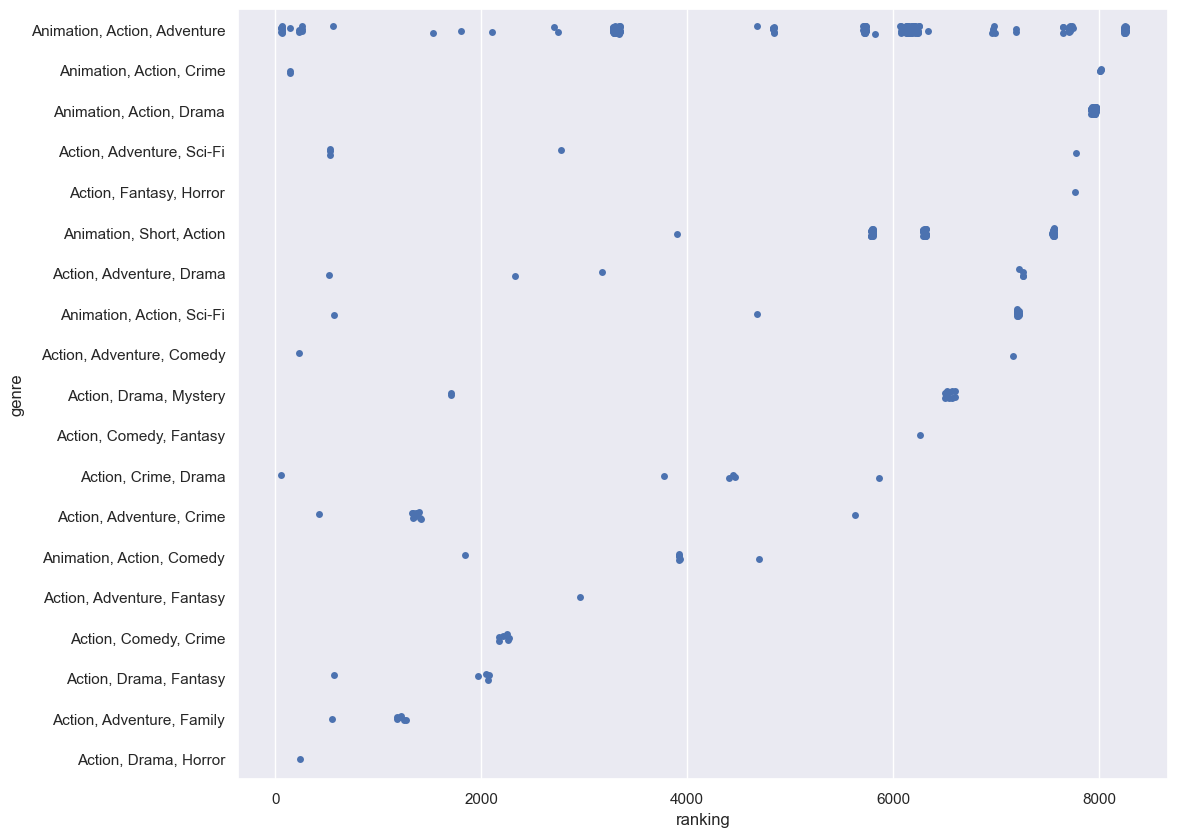

In [55]:
genre_an = dataload_ex[["genre", "ranking"]].copy()  # Make a copy of the DataFrame
genre_an['ranking'] = pd.to_numeric(genre_an['ranking'].str.replace(',', ''), errors='coerce')
genre_an = genre_an.sort_values('ranking', ascending=False)

sns.stripplot(x="ranking", y="genre", data=genre_an)

highest_ranked_genre = genre_an.loc[genre_an['ranking'].idxmax(), 'genre']
print("The genre with the highest ranking is:", highest_ranked_genre)
